In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
#! pip install pandas_datareader

In [3]:
import yfinance as yf

In [4]:
start = '2013-08-31'
end = '2023-07-30'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-03,17.610714,17.878571,17.405357,17.449286,15.228873,331928800
2013-09-04,17.841429,17.937143,17.724285,17.810356,15.544005,345032800
2013-09-05,17.866072,17.881430,17.629999,17.688213,15.437406,236367600
2013-09-06,17.801430,17.834999,17.498215,17.793571,15.529354,359525600
2013-09-09,18.035713,18.139999,17.981428,18.077499,15.777157,340687200


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-03,17.610714,17.878571,17.405357,17.449286,15.228873,331928800
1,2013-09-04,17.841429,17.937143,17.724285,17.810356,15.544005,345032800
2,2013-09-05,17.866072,17.881430,17.629999,17.688213,15.437406,236367600
3,2013-09-06,17.801430,17.834999,17.498215,17.793571,15.529354,359525600
4,2013-09-09,18.035713,18.139999,17.981428,18.077499,15.777157,340687200


In [6]:
df = df.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,17.610714,17.878571,17.405357,17.449286,331928800
1,17.841429,17.937143,17.724285,17.810356,345032800
2,17.866072,17.881430,17.629999,17.688213,236367600
3,17.801430,17.834999,17.498215,17.793571,359525600
4,18.035713,18.139999,17.981428,18.077499,340687200
...,...,...,...,...,...
2488,193.410004,194.910004,192.250000,192.750000,45377800
2489,193.330002,194.440002,192.919998,193.619995,37283200
2490,193.669998,195.639999,193.320007,194.500000,47471900
2491,196.020004,197.199997,192.550003,193.220001,47460200


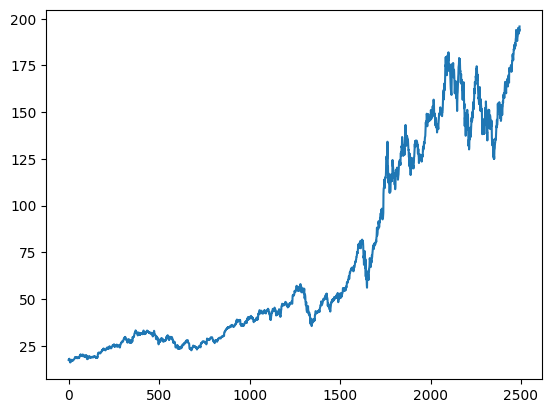

In [7]:
plt.plot(df['Close'])

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2488    172.4232
2489    172.9063
2490    173.3922
2491    173.8141
2492    174.2341
Name: Close, Length: 2493, dtype: float64

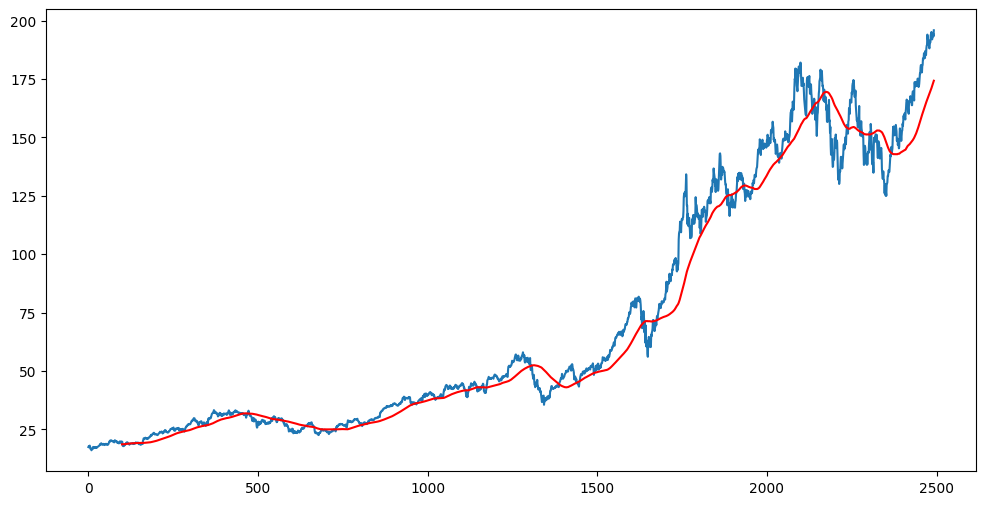

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2488    157.70575
2489    157.94185
2490    158.18720
2491    158.45285
2492    158.72990
Name: Close, Length: 2493, dtype: float64

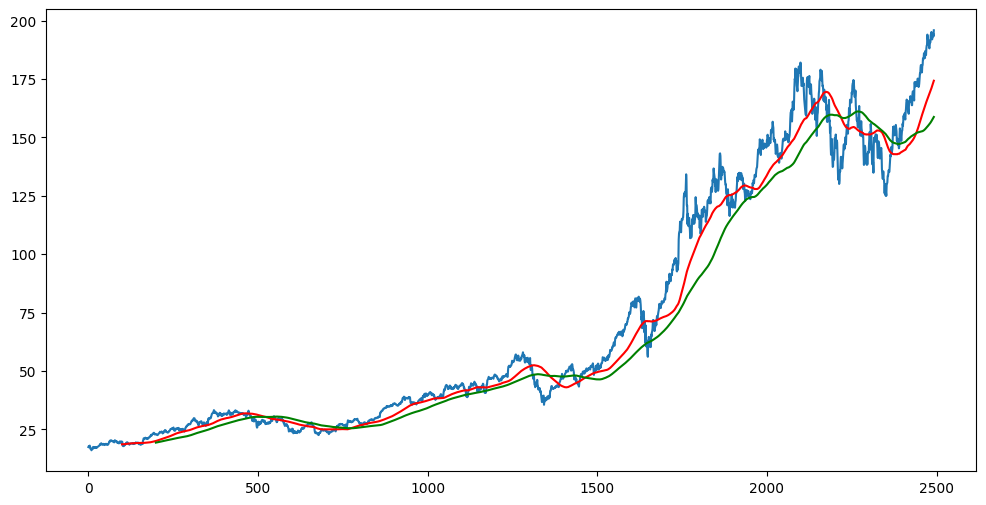

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2493, 5)

In [13]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1745, 1)
(748, 1)


In [14]:
data_training.head()

,Close
0,17.449286
1,17.810356
2,17.688213
3,17.793571
4,18.077499


In [15]:
data_testing.head()

,Close
1745,111.112503
1746,112.727501
1747,109.375000
1748,113.010002
1749,115.010002


In [16]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [17]:
close= df['Close']
X= close.values
X

array([ 17.44928551,  17.81035614,  17.68821335, ..., 194.5       ,
       193.22000122, 195.83000183])

In [18]:
X_shaped=X.reshape(-1,1)

scalar= MinMaxScaler(feature_range=(0,1))
X_scaled=scalar.fit_transform(X_shaped)
X_scaled

array([[0.00764138],
       [0.00965007],
       [0.00897057],
       ...,
       [0.992601  ],
       [0.98548018],
       [1.        ]])

In [19]:
X_scaled.shape

(2493, 1)

In [20]:
print(len(X_scaled))
thresh= int(len(X)*.7)
thresh

2493


1745

In [21]:
train_data = X_scaled[:thresh,:]
xtrain=[]
ytrain=[]
for i in range(100,len(train_data)):
    xtrain.append(train_data[i-100:i,0])
    ytrain.append(train_data[i,0])

In [22]:
# convert the list to numpy array
xtrain,ytrain= np.array(xtrain),np.array(ytrain)

In [23]:
xtrain.shape

(1645, 100)

In [24]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [25]:
xtrain.shape

(1645, 100, 1)

In [26]:
# ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (100,1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer= 'adam', loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
52/52 [==============================] - 28s 286ms/step - loss: 0.0060
Epoch 2/20
52/52 [==============================] - 15s 282ms/step - loss: 0.0011
Epoch 3/20
52/52 [==============================] - 15s 283ms/step - loss: 0.0010
Epoch 4/20
52/52 [==============================] - 15s 279ms/step - loss: 9.0456e-04
Epoch 5/20
52/52 [==============================] - 15s 280ms/step - loss: 8.4621e-04
Epoch 6/20
52/52 [==============================] - 15s 282ms/step - loss: 8.2989e-04
Epoch 7/20
52/52 [==============================] - 15s 292ms/step - loss: 9.4749e-04
Epoch 8/20
52/52 [==============================] - 20s 379ms/step - loss: 8.2954e-04
Epoch 9/20
52/52 [==============================] - 16s 300ms/step - loss: 7.1648e-04
Epoch 10/20
52/52 [==============================] - 15s 291ms/step - loss: 7.0296e-04
Epoch 11/20
52/52 [==============================] - 15s 297ms/step - loss: 6.6843e-04
Epoch 12/20
52/52 [==============================] - 15s 292ms/s

In [31]:
model.save('keras_model.h5')


c:\Users\Anuja\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
data_training.tail(100)

,Close
1645,63.215000
1646,61.667500
1647,61.195000
1648,57.310001
1649,56.092499
...,...
1740,106.260002
1741,108.937500
1742,109.665001
1743,110.062500


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

,Close
0,63.215000
1,61.667500
2,61.195000
3,57.310001
4,56.092499


In [36]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.05097058],
       [0.03989624],
       [0.0365149 ],
       [0.00871278],
       [0.        ],
       [0.04027196],
       [0.03783882],
       [0.06095359],
       [0.04181056],
       [0.05445926],
       [0.05352893],
       [0.02959121],
       [0.03678325],
       [0.03048575],
       [0.06816353],
       [0.06272475],
       [0.07460419],
       [0.07803917],
       [0.08744969],
       [0.11213882],
       [0.10745146],
       [0.11149478],
       [0.10453527],
       [0.09403345],
       [0.07871903],
       [0.09254855],
       [0.09063423],
       [0.10483944],
       [0.10519728],
       [0.0969854 ],
       [0.11335542],
       [0.12421503],
       [0.11575277],
       [0.12307005],
       [0.13094195],
       [0.1364344 ],
       [0.14199838],
       [0.15343055],
       [0.16216122],
       [0.15572056],
       [0.14899364],
       [0.15237501],
       [0.14910098],
       [0.16207173],
       [0.15881567],
       [0.16971109],
       [0.1654531 ],
       [0.169

In [37]:
input_data.shape

(848, 1)

In [38]:
test_data = X_scaled[thresh:,:]
xtest=[]
ytest=[]
for i in range(100,len(test_data)):
    xtest.append(input_data[i-100:i,0])
    ytest.append(input_data[i,0])
xtest= np.array(xtest)
ytest=np.array(ytest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [39]:
xtest.shape

(648, 100, 1)

In [40]:
ytest.shape

(648,)

In [41]:
# Meking Predictions

In [42]:
ypred = model.predict(xtest)

21/21 [==============================] - 4s 96ms/step


In [43]:
ypred.shape

(648, 1)

In [44]:
ytest

array([0.39373828, 0.40529565, 0.38130423, 0.40731731, 0.42162986,
       0.42089633, 0.41874943, 0.42558368, 0.42662132, 0.44499509,
       0.48861259, 0.49925752, 0.49186866, 0.50401645, 0.49319261,
       0.49174347, 0.52203233, 0.55881558, 0.53892114, 0.46363716,
       0.46420967, 0.4059576 , 0.43816083, 0.41075229, 0.40008945,
       0.42413454, 0.42542267, 0.40101975, 0.38821001, 0.36316305,
       0.38634942, 0.39872974, 0.36516685, 0.37303874, 0.4020932 ,
       0.42127202, 0.41504604, 0.42735484, 0.43436802, 0.40738883,
       0.43229269, 0.40839076, 0.42213079, 0.4213436 , 0.43565615,
       0.48882727, 0.46521155, 0.46585564, 0.4624206 , 0.45032648,
       0.42857145, 0.43952054, 0.43494053, 0.42692548, 0.42184454,
       0.42191611, 0.43300831, 0.39436441, 0.42384828, 0.37761875,
       0.37697466, 0.38892568, 0.42120044, 0.45039806, 0.44796495,
       0.43100456, 0.42849987, 0.45368994, 0.45168619, 0.45204403,
       0.45948656, 0.45297432, 0.44324178, 0.44760712, 0.43830

In [45]:
ypred

array([[0.28985032],
       [0.29603523],
       [0.3036322 ],
       [0.31221464],
       [0.32142806],
       [0.33101583],
       [0.340749  ],
       [0.35040015],
       [0.35978734],
       [0.36875838],
       [0.37727353],
       [0.38550603],
       [0.39368054],
       [0.40192598],
       [0.41032028],
       [0.4188075 ],
       [0.42724556],
       [0.4355998 ],
       [0.44399592],
       [0.45245895],
       [0.4604545 ],
       [0.46740204],
       [0.47247666],
       [0.4752974 ],
       [0.475643  ],
       [0.47350967],
       [0.46924803],
       [0.46337342],
       [0.45630038],
       [0.4483351 ],
       [0.4396178 ],
       [0.43042836],
       [0.42116314],
       [0.41201764],
       [0.40317565],
       [0.3949775 ],
       [0.38783932],
       [0.38205817],
       [0.3778747 ],
       [0.3754136 ],
       [0.37449777],
       [0.37497455],
       [0.3765084 ],
       [0.37881535],
       [0.38163757],
       [0.38483942],
       [0.38856488],
       [0.392

In [46]:
scalar.scale_

array([0.00715628])

In [47]:
scale_factor = 1/0.00715628
ypred = ypred * scale_factor
ytest = ytest * scale_factor

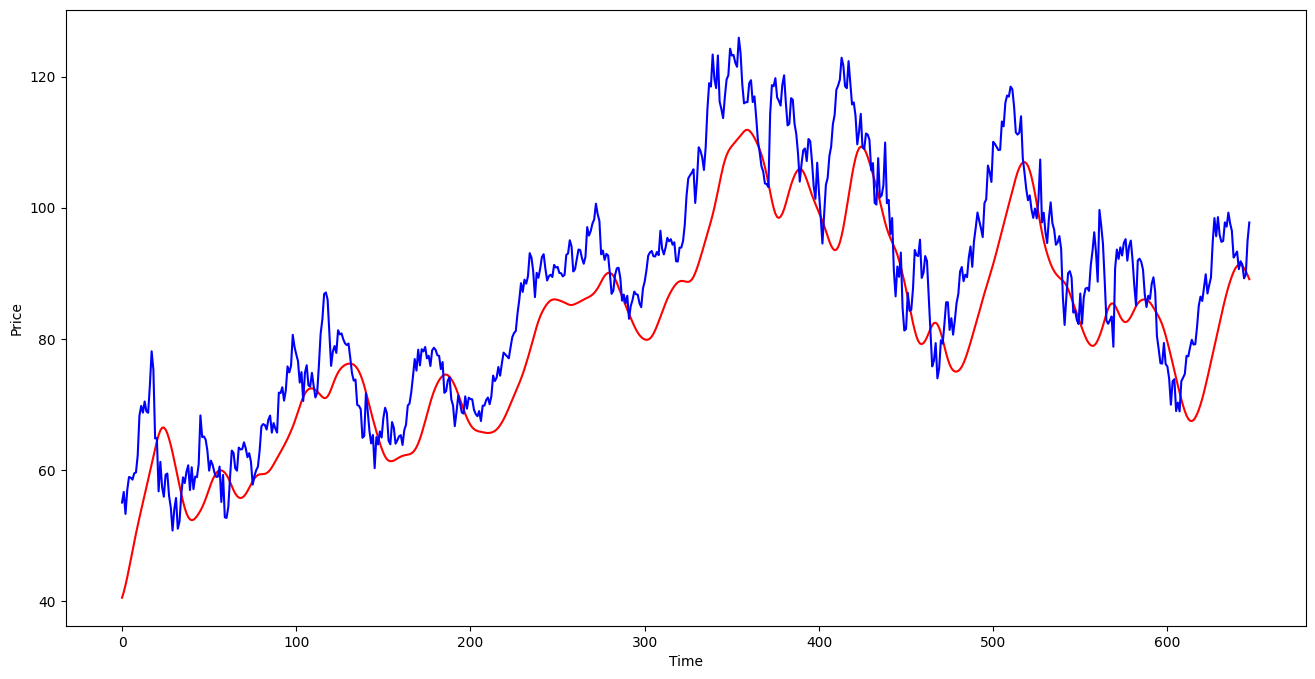

In [48]:
plt.figure(figsize=(16,8))
plt.plot(ypred,color='red',label='Predicted Price')
plt.plot(ytest,color='blue',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend
plt.show()

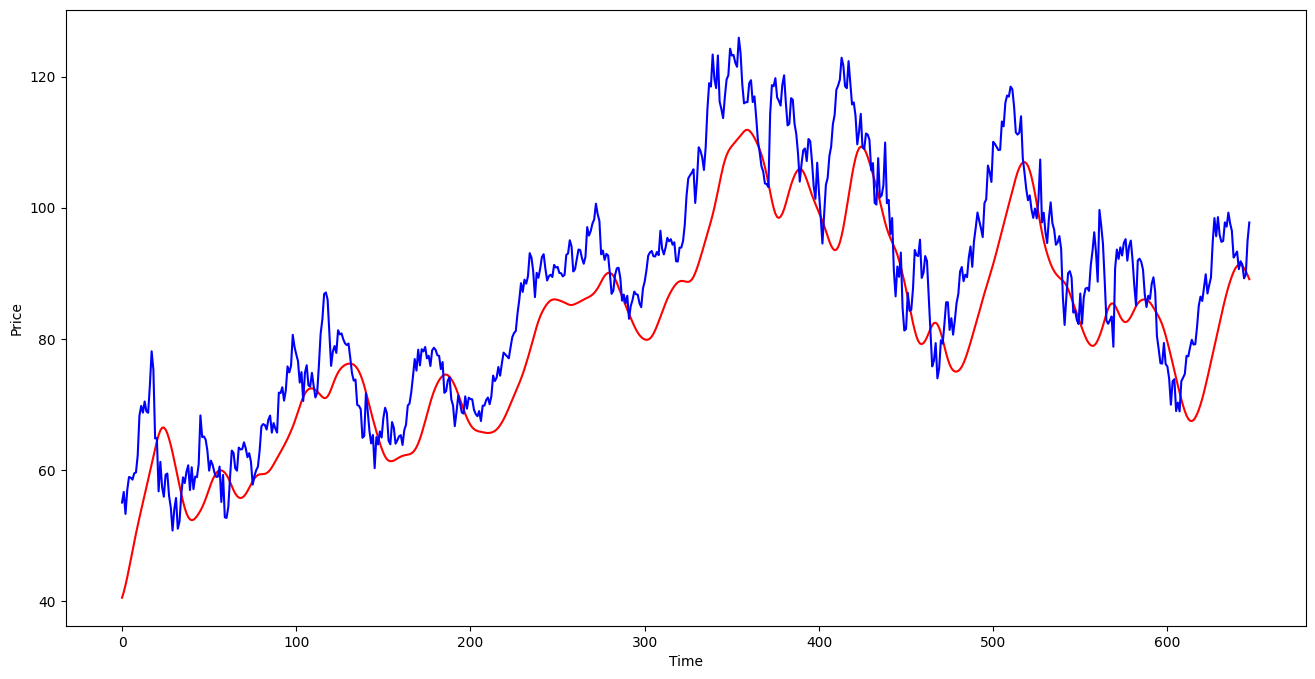

In [49]:
plt.figure(figsize=(16,8))
plt.plot(ypred,color='red',label='Predicted Price')
plt.plot(ytest,color='blue',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend
plt.show()